# AI & ML Capstone Project
5th October 2021
# Topic: Customer Segmentation

Grouping customers into sections based on their common characteristics is called Customer Segmentation. These clusters allow the companies to target the customers with the correct marketing message and tailor their offers for a specific group. This not only helps them boost their sales, but also helps them build customer relations and understand them in a better way.


In this project, our aim will be to perform customer segmentation on Online Retail Dataset (https://archive.ics.uci.edu/ml/datasets/Online+Retail#) to understand the customers. Given this dataset, our task is to:

a) Load the dataset and perform a descriptive analysis on it (Total number of entries, the column types, unique/non-null entries for each attribute, unique stock items, visualizing various attributes using bar charts/pie-charts and so on).

b) Perform data cleaning. Specifically, given the dataset, handle the entries that either have missing information or have attribute values that are not feasible such as negative quantity.

c) Perform data pre-processing for the required attribute fields.

d) Since this database has no additional attribute information for the customer, we will use RFM model (refer: https://clevertap.com/blog/rfm-analysis/) for segmentation. Modify the database to include RFM model attributes.

e) Now once you have your database ready, perform data clustering on this dataset by assuming a fixed number of clusters.

f) Find the optimal number of clusters that the customers can be divided into.

In [1]:
# Importing Modules and relevant libraries
import numpy as np # for numerical statistical analysis
import pandas as pd # for dataset loading and using dataframes
import matplotlib.pyplot as plt # for plotting simple scatter graphs
import seaborn as sns # for plotting EDA graphs
import datetime as dt
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# Load the dataset
our aim will be to perform customer segmentation on
Online Retail Dataset (https://archive.ics.uci.edu/ml/datasets/Online+Retail#) to understand the customers.

In [2]:
data = pd.read_excel("Online Retail.xlsx")

# Perform a descriptive analysis on it 
(Total number of entries, the column types, unique/non-null entries for each attribute, unique stock items, visualizing various attributes using bar charts/pie-charts and so on).

In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
# Removing Null values
data= data[pd.notnull(data['CustomerID'])]

In [7]:
# Drop Duplicates
filtered_data=data[['Country','CustomerID']].drop_duplicates()

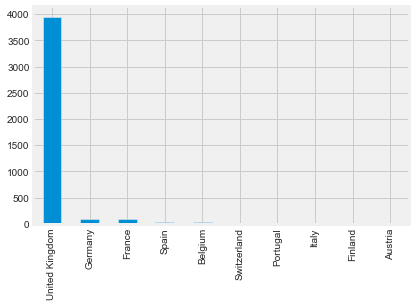

In [8]:
#Top ten country's customer
filtered_data.Country.value_counts()[:10].plot(kind='bar')

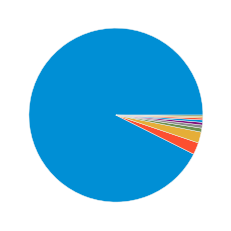

In [9]:
pie = filtered_data.Country.value_counts()[:10]
plt.pie(pie)

plt.show()

In [10]:
#Customers - country's customer segregation
print(filtered_data.Country.value_counts())

United Kingdom          3950
Germany                   95
France                    87
Spain                     31
Belgium                   25
Switzerland               21
Portugal                  19
Italy                     15
Finland                   12
Austria                   11
Norway                    10
Australia                  9
Netherlands                9
Denmark                    9
Channel Islands            9
Sweden                     8
Cyprus                     8
Japan                      8
Poland                     6
Unspecified                4
Greece                     4
USA                        4
Canada                     4
Israel                     4
EIRE                       3
Malta                      2
Bahrain                    2
United Arab Emirates       2
European Community         1
Lithuania                  1
Singapore                  1
Czech Republic             1
RSA                        1
Iceland                    1
Lebanon       

# b) Perform data cleaning. Specifically, given the dataset, handle the entries that either have missing information or have attribute values that are not feasible such as negative quantity.

In [11]:
uk_data=data[data.Country=='United Kingdom']

In [12]:
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361878 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    361878 non-null  object        
 1   StockCode    361878 non-null  object        
 2   Description  361878 non-null  object        
 3   Quantity     361878 non-null  int64         
 4   InvoiceDate  361878 non-null  datetime64[ns]
 5   UnitPrice    361878 non-null  float64       
 6   CustomerID   361878 non-null  float64       
 7   Country      361878 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.8+ MB


In [13]:
uk_data_Country=uk_data['Country'].value_counts()
print(uk_data_Country)

United Kingdom    361878
Name: Country, dtype: int64


In [14]:
uk_data.describe()

,Quantity,UnitPrice,CustomerID
count,361878.000000,361878.000000,361878.000000
mean,11.077029,3.256007,15547.871368
std,263.129266,70.654731,1594.402590
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,14194.000000
50%,4.000000,1.950000,15514.000000
75%,12.000000,3.750000,16931.000000
max,80995.000000,38970.000000,18287.000000


In [15]:
# Remove Negative Numbers (Infeasible / Outliers)
uk_data = uk_data[(uk_data['Quantity']>0)]
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354345 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    354345 non-null  object        
 1   StockCode    354345 non-null  object        
 2   Description  354345 non-null  object        
 3   Quantity     354345 non-null  int64         
 4   InvoiceDate  354345 non-null  datetime64[ns]
 5   UnitPrice    354345 non-null  float64       
 6   CustomerID   354345 non-null  float64       
 7   Country      354345 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.3+ MB


# c) Perform data pre-processing for the required attribute fields.

In [16]:
# Numerical Dtype selection and Datetime
uk_data=uk_data[['CustomerID','InvoiceDate','InvoiceNo','Quantity','UnitPrice']]

In [17]:
#Total purchased Amount
uk_data['TotalPrice'] = uk_data['Quantity'] * uk_data['UnitPrice']

In [18]:
# Range of datestamp on the Invoice dates
uk_data['InvoiceDate'].min(),uk_data['InvoiceDate'].max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:49:00'))

In [19]:
PRESENT = dt.datetime(2011,12,10)
uk_data['InvoiceDate'] = pd.to_datetime(uk_data['InvoiceDate'])

In [20]:
uk_data.head()

,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice,TotalPrice
0,17850.0,2010-12-01 08:26:00,536365,6,2.55,15.30
1,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
2,17850.0,2010-12-01 08:26:00,536365,8,2.75,22.00
3,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
4,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34


# d) Since this database has no additional attribute information for the customer, we will use RFM model (refer: https://clevertap.com/blog/rfm-analysis/) for segmentation. Modify the database to include RFM model attributes.

In [21]:
rfm= uk_data.groupby('CustomerID').agg({'InvoiceDate': lambda date: (PRESENT - date.max()).days,
                                        'InvoiceNo': lambda num: len(num),
                                        'TotalPrice': lambda price: price.sum()})

In [22]:
rfm.columns

Index(['InvoiceDate', 'InvoiceNo', 'TotalPrice'], dtype='object')

In [23]:
# Change the name of columns
rfm.columns=['monetary','frequency','recency']

In [24]:
rfm['recency'] = rfm['recency'].astype(int)

In [25]:
rfm.head()

,monetary,frequency,recency
CustomerID,,,
12346.0,325,1,77183
12747.0,2,103,4196
12748.0,0,4596,33719
12749.0,3,199,4090
12820.0,3,59,942


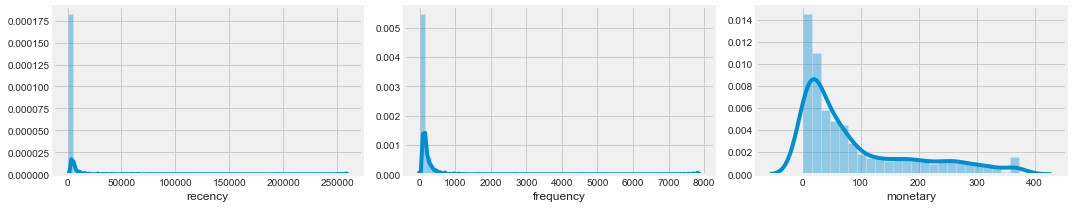

In [26]:
fig, ax = plt.subplots(1, 3, figsize=(15,3))
sns.distplot(rfm['recency'], ax=ax[0])
sns.distplot(rfm['frequency'], ax=ax[1])
sns.distplot(rfm['monetary'], ax=ax[2])
plt.tight_layout()
plt.show()

In [27]:
rfm['r_quartile'] = pd.qcut(rfm['recency'], 4, ['1','2','3','4'])
rfm['f_quartile'] = pd.qcut(rfm['frequency'], 4, ['4','3','2','1'])
rfm['m_quartile'] = pd.qcut(rfm['monetary'], 4, ['4','3','2','1'])

In [28]:
rfm.head()

,monetary,frequency,recency,r_quartile,f_quartile,m_quartile
CustomerID,,,,,,
12346.0,325,1,77183,4,4,1
12747.0,2,103,4196,4,1,4
12748.0,0,4596,33719,4,1,4
12749.0,3,199,4090,4,1,4
12820.0,3,59,942,3,2,4


In [29]:
rfm['RFM_Score'] = rfm.r_quartile.astype(str)+ rfm.f_quartile.astype(str) + rfm.m_quartile.astype(str)
rfm.head()

,monetary,frequency,recency,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
12346.0,325,1,77183,4,4,1,441
12747.0,2,103,4196,4,1,4,414
12748.0,0,4596,33719,4,1,4,414
12749.0,3,199,4090,4,1,4,414
12820.0,3,59,942,3,2,4,324


In [30]:
# Filter out Top/Best customers
rfm[rfm['RFM_Score']>'111'].sort_values('monetary', ascending=False).head()

,monetary,frequency,recency,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
17643.0,373,8,101,1,4,1,141
15165.0,373,27,487,2,3,1,231
13747.0,373,1,79,1,4,1,141
17908.0,373,58,243,1,2,1,121
17968.0,373,85,277,1,2,1,121


# e) Now once you have your database ready, perform data clustering on this dataset by assuming a fixed number of clusters.

In [31]:
uk_data.head()

,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice,TotalPrice
0,17850.0,2010-12-01 08:26:00,536365,6,2.55,15.30
1,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
2,17850.0,2010-12-01 08:26:00,536365,8,2.75,22.00
3,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
4,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34


In [32]:
uk_data.describe()

,CustomerID,Quantity,UnitPrice,TotalPrice
count,354345.000000,354345.000000,354345.000000,354345.000000
mean,15552.436219,12.048913,2.963793,20.625073
std,1594.546025,190.428127,17.862067,326.033014
min,12346.000000,1.000000,0.000000,0.000000
25%,14194.000000,2.000000,1.250000,4.160000
50%,15522.000000,4.000000,1.950000,10.200000
75%,16931.000000,12.000000,3.750000,17.700000
max,18287.000000,80995.000000,8142.750000,168469.600000


In [33]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [34]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


categories=['InvoiceNo', 'StockCode','InvoiceDate', 'Quantity','CustomerID']
for i in categories:
    plt.figure(figsize=(20,6))
    plt.subplot(1,2,1)
    sns.countplot(x=data[i],palette="Pastel1")
    
    plt.subplot(1,2,2)
    sns.countplot(x=data[i],hue=data.Country, palette=["#f08080","#87cefa"])
    plt.show()

categories=['InvoiceNo', 'StockCode','InvoiceDate', 'Quantity','CustomerID']
for i in categories:
    plt.figure(figsize=(20,6))
    plt.subplot(1,2,1)
    sns.countplot(x=uk_data[i],palette="Pastel1")
    
    plt.subplot(1,2,2)
    sns.countplot(x=uk_data[i],hue=uk_data.Country, palette=["#f08080","#87cefa"])
    plt.show()

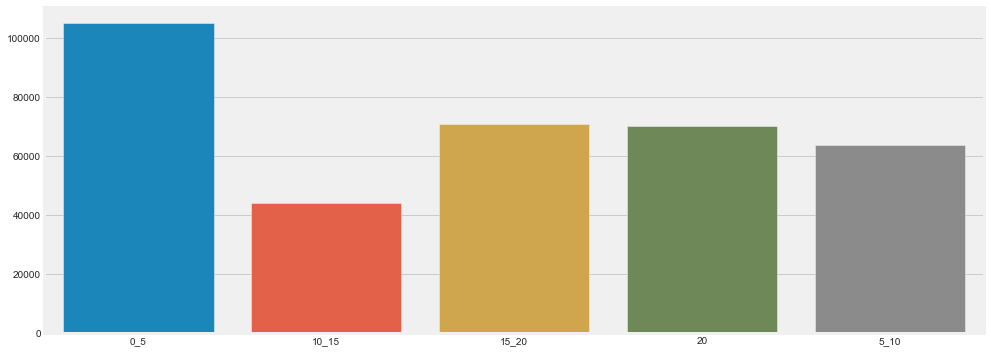

In [35]:
TotalPrice0_5 = uk_data.TotalPrice[(uk_data.TotalPrice<5)&(uk_data.TotalPrice>=0)]
TotalPrice5_10 = uk_data.TotalPrice[(uk_data.TotalPrice<10)&(uk_data.TotalPrice>=5)]
TotalPrice10_15 = uk_data.TotalPrice[(uk_data.TotalPrice<15)&(uk_data.TotalPrice>=10)]
TotalPrice15_20 = uk_data.TotalPrice[(uk_data.TotalPrice<20)&(uk_data.TotalPrice>=15)]
TotalPrice20above = uk_data.TotalPrice[(uk_data.TotalPrice>=20)]
x=["0_5","5_10","10_15","15_20","20"]
y=[len(TotalPrice0_5.values), len(TotalPrice5_10.values),len(TotalPrice10_15.values),len(TotalPrice15_20.values),len(TotalPrice20above.values)]
plt.figure(figsize=(15,6))
plt.title=("Number of Customers and TotalPrices")
plt.xlabel=("TotalPrices")
plt.ylabel=("Number of Customers")
sns.barplot(x=x,y=y)
plt.show()

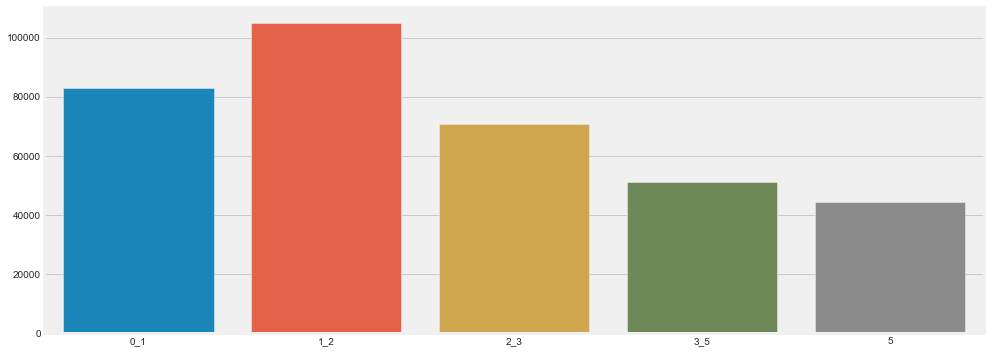

In [36]:
UnitPrice0_1 = uk_data.UnitPrice[(uk_data.UnitPrice<1.0)&(uk_data.UnitPrice>=0.0)]
UnitPrice1_2 = uk_data.UnitPrice[(uk_data.UnitPrice<2.0)&(uk_data.UnitPrice>=1.0)]
UnitPrice2_3 = uk_data.UnitPrice[(uk_data.UnitPrice<3.0)&(uk_data.UnitPrice>=2.0)]
UnitPrice3_5 = uk_data.UnitPrice[(uk_data.UnitPrice<5.0)&(uk_data.UnitPrice>=3.0)]
UnitPrice5above = uk_data.UnitPrice[(uk_data.UnitPrice>=5.0)]
x=["0_1","1_2","2_3","3_5","5"]
y=[len(UnitPrice0_1.values), len(UnitPrice1_2.values),len(UnitPrice2_3.values),len(UnitPrice3_5.values),len(UnitPrice5above.values)]
plt.figure(figsize=(15,6))
plt.title=("Number of Customers and UnitPrice")
plt.xlabel=("UnitPrice")
plt.ylabel=("Number of Customers")
sns.barplot(x=x,y=y)
plt.show()

In [37]:
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354345 entries, 0 to 541893
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   CustomerID   354345 non-null  float64       
 1   InvoiceDate  354345 non-null  datetime64[ns]
 2   InvoiceNo    354345 non-null  object        
 3   Quantity     354345 non-null  int64         
 4   UnitPrice    354345 non-null  float64       
 5   TotalPrice   354345 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 18.9+ MB


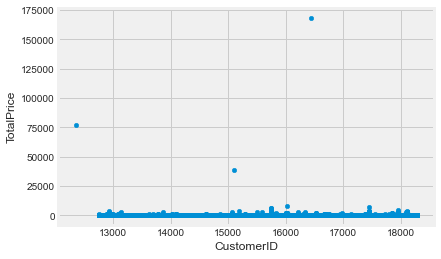

In [38]:
uk_data.plot(kind='scatter',x = 'CustomerID',y = 'TotalPrice')

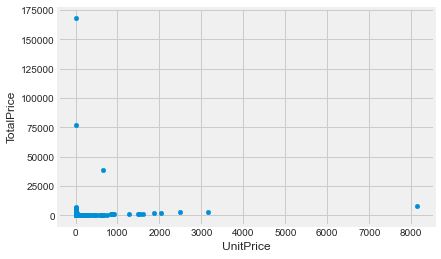

In [39]:
uk_data.plot(kind='scatter',x = 'UnitPrice',y = 'TotalPrice')

In [40]:
uk_data['CustomerID'].unique()

array([17850., 13047., 13748., ..., 15520., 13298., 14569.])

In [41]:
from scipy import stats
def analyze_skewness(x):
    fig, ax = plt.subplots(2, 2, figsize=(5,5))
    sns.distplot(rfm[x], ax=ax[0,0])
    sns.distplot(np.log(rfm[x]), ax=ax[0,1])
    sns.distplot(np.sqrt(rfm[x]), ax=ax[1,0])
    sns.distplot(stats.boxcox(rfm[x])[0], ax=ax[1,1])
    plt.tight_layout()
    plt.show()
    try:
        print(rfm[x].skew().round(2))
        print(np.log(rfm[x]).skew().round(2))
        print(np.sqrt(rfm[x]).skew().round(2))
        print(pd.Series(stats.boxcox(rfm[x])[0]).skew().round(2))
    except OverflowError as oe:
        print("After overflow", oe)

In [42]:
def round_int(x):
    if x in [float("-inf"),float("inf")]: return float("nan")
    return int(round(x))

In [43]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 3921 entries, 12346.0 to 18287.0
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   monetary    3921 non-null   int64   
 1   frequency   3921 non-null   int64   
 2   recency     3921 non-null   int32   
 3   r_quartile  3921 non-null   category
 4   f_quartile  3921 non-null   category
 5   m_quartile  3921 non-null   category
 6   RFM_Score   3921 non-null   object  
dtypes: category(3), int32(1), int64(2), object(1)
memory usage: 149.9+ KB


In [44]:
rfm_monetary_df=pd.Series(np.cbrt(rfm['monetary'])).values
print(rfm_monetary_df)

[6.87534434 1.25992105 0.         ... 1.91293118 1.44224957 3.47602664]


In [45]:
# Set the Numbers
rfm_fix = pd.DataFrame()
#rfm_fix["recency"] = stats.boxcox(rfm['recency'])[0]
rfm_fix["frequency"] = stats.boxcox(rfm['frequency'])[0]
rfm_fix["monetary"] = pd.Series(np.cbrt(rfm['monetary'])).values
rfm_fix.tail()

,frequency,monetary
3916,2.457480,6.518684
3917,2.055787,5.646216
3918,2.665931,1.912931
3919,8.024068,1.442250
3920,4.795920,3.476027


In [46]:
rfm.describe()

,monetary,frequency,recency
count,3921.000000,3921.000000,3921.000000
mean,91.722265,90.371079,1863.424382
std,99.528532,217.796155,7481.915668
min,0.000000,1.000000,0.000000
25%,17.000000,17.000000,300.000000
50%,50.000000,41.000000,651.000000
75%,142.000000,99.000000,1575.000000
max,373.000000,7847.000000,259657.000000


In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(rfm)
customers_normalized = scaler.transform(rfm)
print(customers_normalized.mean(axis = 0).round(2))
print(customers_normalized.std(axis = 0).round(2))

[ 0. -0. -0.  0. -0. -0.  0.]
[1. 1. 1. 1. 1. 1. 1.]


In [48]:
pd.DataFrame(customers_normalized).head()

,0,1,2,3,4,5,6
0,2.344127,-0.410395,10.068168,1.341531,1.312980,-1.344088,1.565214
1,-0.901588,0.057992,0.311802,1.341531,-1.343924,1.327057,1.306790
2,-0.921685,20.690005,4.258219,1.341531,-1.343924,1.327057,1.306790
3,-0.891539,0.498828,0.297632,1.341531,-1.343924,1.327057,1.306790
4,-0.891539,-0.144057,-0.123169,0.448468,-0.458289,1.327057,0.445375


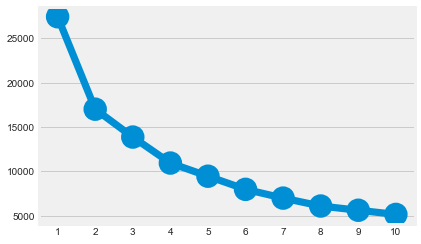

In [49]:
from sklearn.cluster import KMeans

sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customers_normalized)
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid

#plt.title('The Elbow Method')
#plt.xlabel('k')
#plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

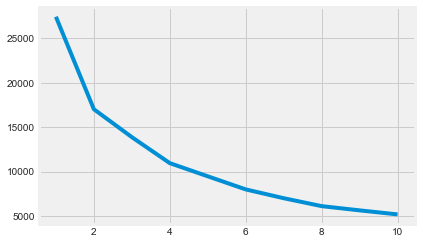

In [50]:
from sklearn.cluster import KMeans
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(customers_normalized)
    kmeans.fit(customers_normalized)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
#plt.title('Elbow method')
#plt.xlabel('No of clusters')
#plt.ylabel('Error')
plt.show()

In [51]:
model = KMeans(n_clusters=4, random_state=42)
model.fit(customers_normalized)
model.labels_.shape

(3921,)

In [52]:
rfm.shape

(3921, 7)

In [53]:
rfm["Cluster"] = model.labels_
rfm.head()

,monetary,frequency,recency,r_quartile,f_quartile,m_quartile,RFM_Score,Cluster
CustomerID,,,,,,,,
12346.0,325,1,77183,4,4,1,441,2
12747.0,2,103,4196,4,1,4,414,0
12748.0,0,4596,33719,4,1,4,414,2
12749.0,3,199,4090,4,1,4,414,0
12820.0,3,59,942,3,2,4,324,0


In [54]:
rfm.groupby('Cluster').agg({
    'recency':'mean',
    'frequency':'mean',
    'monetary':['mean', 'count']}).round(1)

recency frequency monetary      
            mean      mean     mean count
Cluster                                  
0         3017.3     156.7     35.0  1698
1          378.8      24.5    247.8   936
2        88452.6    1927.3     26.4    15
3          394.4      28.6     53.4  1272

In [55]:
kmeans = KMeans(n_clusters=3,init = 'k-means++',   max_iter = 100, n_init = 10, random_state = 0) #Applying Kmeans classifier

In [56]:
#Predicting the cluster for our data
y_kmeans = kmeans.fit_predict(rfm)

In [57]:
print(kmeans.cluster_centers_)

[[9.22602881e+01 8.30707305e+01 1.35739378e+03 2.48508230e+00
  2.52623457e+00 2.50000000e+00 2.76270576e+02 1.22273663e+00]
 [2.66666667e+00 2.57000000e+02 2.07559667e+05 4.00000000e+00
  2.00000000e+00 4.00000000e+00 4.24000000e+02 2.00000000e+00]
 [3.09000000e+01 1.01983333e+03 4.68753667e+04 4.00000000e+00
  1.43333333e+00 3.60000000e+00 4.17933333e+02 7.33333333e-01]]


In [58]:
y_kmeans

array([2, 0, 2, ..., 0, 0, 0])

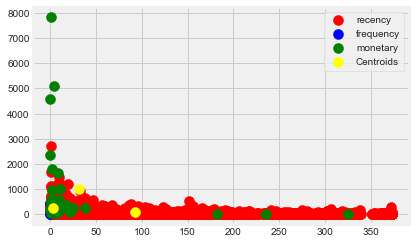

In [59]:
#Visualising the clusters
x = np.array(rfm)
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'recency')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'frequency')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'monetary')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

In [60]:
vectorized = x.reshape((-1,3))
vectorized = np.float32(vectorized)

In [61]:
import matplotlib.pyplot as plt

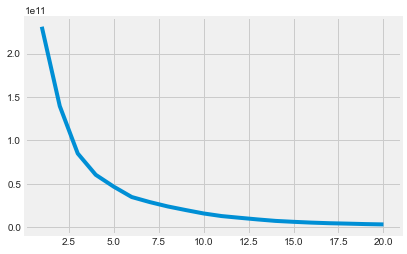

In [64]:
Error =[]
for i in range(1, 21):
    kmeans = KMeans(n_clusters = i).fit(vectorized)
    kmeans.fit(vectorized)
    Error.append(kmeans.inertia_)

plt.plot(range(1, 21), Error)
#plt.xlabel('No of clusters')
#plt.ylabel('Error')
#plt.title('Elbow method')
plt.show()